### Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [42]:
data = pd.read_csv('Customer_Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [43]:
df1 = data.drop(['customerID','PhoneService', 'MultipleLines', 'PaymentMethod' , 'PaperlessBilling', 'Partner','Dependents', 'InternetService', 'OnlineBackup', 'StreamingTV', 'StreamingMovies'] , axis = 'columns')
df1

,gender,SeniorCitizen,tenure,OnlineSecurity,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,34,Yes,Yes,No,One year,56.95,1889.5,No
2,Male,0,2,Yes,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,45,Yes,Yes,Yes,One year,42.30,1840.75,No
4,Female,0,2,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,72,No,Yes,No,One year,103.20,7362.9,No
7040,Female,0,11,Yes,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,4,No,No,No,Month-to-month,74.40,306.6,Yes


In [44]:
df1.isna().sum()

gender              0
SeniorCitizen       0
tenure              0
OnlineSecurity      0
DeviceProtection    0
TechSupport         0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [47]:
df3 = pd.get_dummies(data=df1, columns=['OnlineSecurity','DeviceProtection','TechSupport' ,'gender', 'Contract'])
df3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,No,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0,34,56.95,1889.5,No,0,0,1,0,0,1,1,0,0,0,1,0,1,0
2,0,2,53.85,108.15,Yes,0,0,1,1,0,0,1,0,0,0,1,1,0,0
3,0,45,42.30,1840.75,No,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,0,2,70.70,151.65,Yes,1,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,No,0,0,1,0,0,1,0,0,1,0,1,0,1,0
7039,0,72,103.20,7362.9,No,1,0,0,0,0,1,1,0,0,1,0,0,1,0
7040,0,11,29.60,346.45,No,0,0,1,1,0,0,1,0,0,1,0,1,0,0
7041,1,4,74.40,306.6,Yes,1,0,0,1,0,0,1,0,0,0,1,1,0,0


In [48]:
df4 = df3.drop(['OnlineSecurity_No internet service', 'DeviceProtection_No internet service','TechSupport_No internet service'], axis = 'columns')
df4

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,No,1,0,1,0,1,0,1,0,1,0,0
1,0,34,56.95,1889.5,No,0,1,0,1,1,0,0,1,0,1,0
2,0,2,53.85,108.15,Yes,0,1,1,0,1,0,0,1,1,0,0
3,0,45,42.30,1840.75,No,0,1,0,1,0,1,0,1,0,1,0
4,0,2,70.70,151.65,Yes,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,No,0,1,0,1,0,1,0,1,0,1,0
7039,0,72,103.20,7362.9,No,1,0,0,1,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,No,0,1,1,0,1,0,1,0,1,0,0
7041,1,4,74.40,306.6,Yes,1,0,1,0,1,0,0,1,1,0,0


In [49]:
df4.dtypes

SeniorCitizen                int64
tenure                       int64
MonthlyCharges             float64
TotalCharges                object
Churn                       object
OnlineSecurity_No            uint8
OnlineSecurity_Yes           uint8
DeviceProtection_No          uint8
DeviceProtection_Yes         uint8
TechSupport_No               uint8
TechSupport_Yes              uint8
gender_Female                uint8
gender_Male                  uint8
Contract_Month-to-month      uint8
Contract_One year            uint8
Contract_Two year            uint8
dtype: object

In [50]:
df4[pd.to_numeric(df4['TotalCharges'], errors = 'coerce').isnull()]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
488,0,0,52.55,,No,0,1,0,1,0,1,1,0,0,0,1
753,0,0,20.25,,No,0,0,0,0,0,0,0,1,0,0,1
936,0,0,80.85,,No,0,1,0,1,1,0,1,0,0,0,1
1082,0,0,25.75,,No,0,0,0,0,0,0,0,1,0,0,1
1340,0,0,56.05,,No,0,1,0,1,0,1,1,0,0,0,1
3331,0,0,19.85,,No,0,0,0,0,0,0,0,1,0,0,1
3826,0,0,25.35,,No,0,0,0,0,0,0,0,1,0,0,1
4380,0,0,20.00,,No,0,0,0,0,0,0,1,0,0,0,1
5218,0,0,19.70,,No,0,0,0,0,0,0,0,1,0,1,0
6670,0,0,73.35,,No,1,0,0,1,0,1,1,0,0,0,1


In [51]:
df5 = df4[df4['TotalCharges']!= ' ']
df5.shape

(7032, 16)

In [52]:
df5.TotalCharges = pd.to_numeric(df5.TotalCharges)

In [53]:
df5.dtypes

SeniorCitizen                int64
tenure                       int64
MonthlyCharges             float64
TotalCharges               float64
Churn                       object
OnlineSecurity_No            uint8
OnlineSecurity_Yes           uint8
DeviceProtection_No          uint8
DeviceProtection_Yes         uint8
TechSupport_No               uint8
TechSupport_Yes              uint8
gender_Female                uint8
gender_Male                  uint8
Contract_Month-to-month      uint8
Contract_One year            uint8
Contract_Two year            uint8
dtype: object

In [54]:
df5['Churn'].replace({'Yes': 1,'No': 0},inplace=True)
df5['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

### Scaling Data

In [55]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df5[columns_to_scale] = scaler.fit_transform(df5[columns_to_scale])
df5

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0.000000,0.115423,0.001275,0,1,0,1,0,1,0,1,0,1,0,0
1,0,0.464789,0.385075,0.215867,0,0,1,0,1,1,0,0,1,0,1,0
2,0,0.014085,0.354229,0.010310,1,0,1,1,0,1,0,0,1,1,0,0
3,0,0.619718,0.239303,0.210241,0,0,1,0,1,0,1,0,1,0,1,0
4,0,0.014085,0.521891,0.015330,1,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,0,1,0,1,0,1,0,1,0,1,0
7039,0,1.000000,0.845274,0.847461,0,1,0,0,1,1,0,1,0,0,1,0
7040,0,0.140845,0.112935,0.037809,0,0,1,1,0,1,0,1,0,1,0,0
7041,1,0.042254,0.558706,0.033210,1,1,0,1,0,1,0,0,1,1,0,0


In [56]:
x= df5.drop(['Churn'], axis = 'columns')
x.shape

(7032, 15)

In [57]:
y= df5['Churn']
y.shape

(7032,)

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test,  y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [59]:
x_train.shape

(5625, 15)

In [60]:
y_train.shape
y_train

4954    1
3918    1
5406    0
1637    0
5191    0
       ..
1184    0
3447    0
1349    0
4631    1
1293    0
Name: Churn, Length: 5625, dtype: int64

### Building ANN Model

In [61]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (15,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics =['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7312
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7733
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7813
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.7838
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7879
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7868
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7890
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7918
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7915
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7913

### Predicting test values

In [62]:
y_prediction = model.predict(x_test)
y_prediction

44/44 [==============================] - 0s 2ms/step


array([[0.01889029],
       [0.01064751],
       [0.17733657],
       ...,
       [0.01525208],
       [0.20898254],
       [0.3421611 ]], dtype=float32)

In [63]:
prediction = []
for element in y_prediction:
    if element >0.5:
        prediction.append(1)
    else:
        prediction.append(0)  
prediction[:10]        

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [64]:
y_test[:10] # Comparing actual values with 'prediction' values

5401    0
1681    0
2076    0
3359    0
6629    0
149     0
1730    1
5971    0
3050    1
1183    0
Name: Churn, dtype: int64

### Model Performance and Heatmap

In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1046
           1       0.61      0.55      0.58       361

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

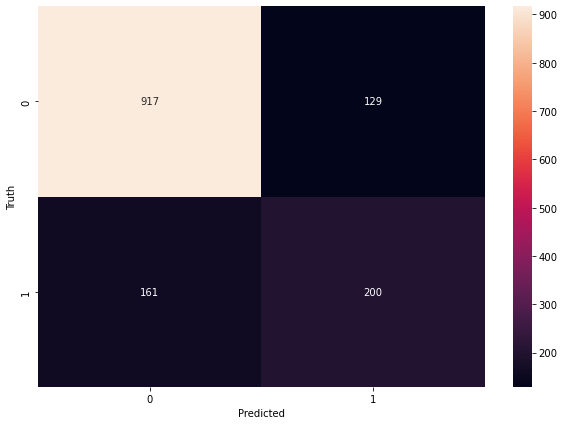

In [70]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions = prediction)
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')